<a href="https://colab.research.google.com/github/Sauravnegi007/data-science/blob/main/mall_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
df=pd.read_csv("Mall_Customers.csv")

In [ ]:
df.shape

(200, 5)

In [ ]:
d

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

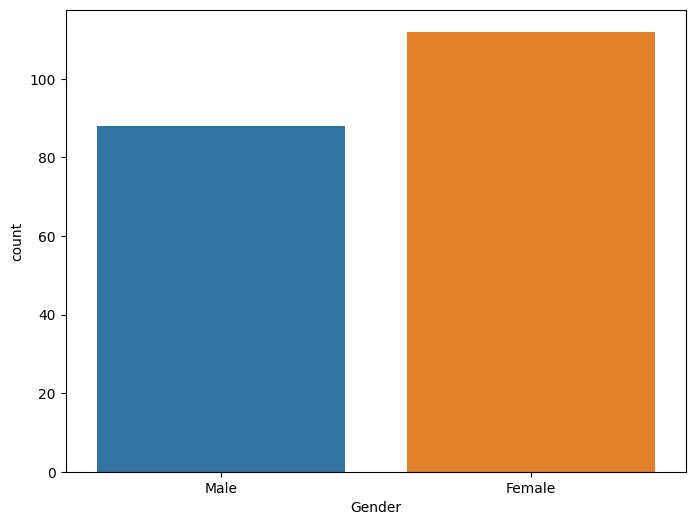

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="Gender",data=df)
plt.show()

<ipython-input-26-f7e44b599dac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


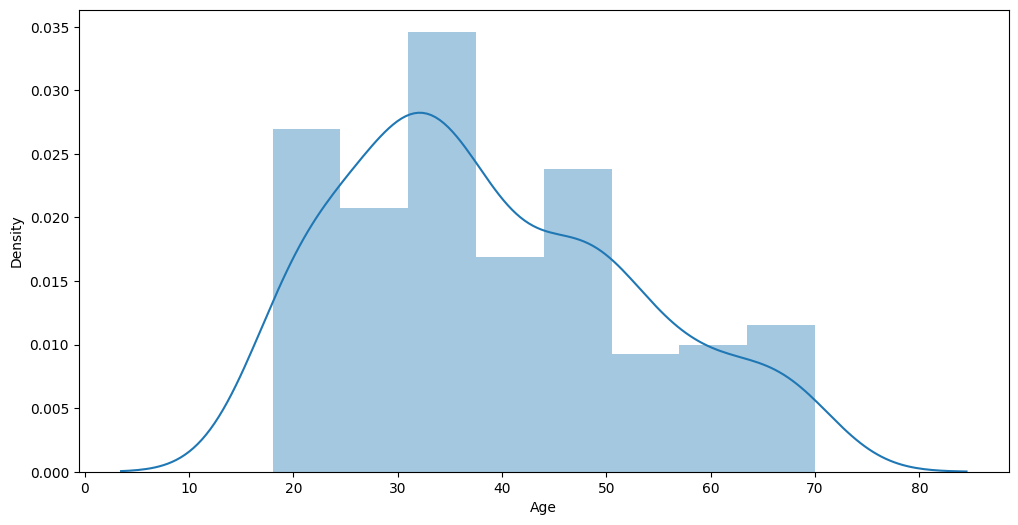

In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(df["Age"])
plt.xlabel("Age")
plt.show()



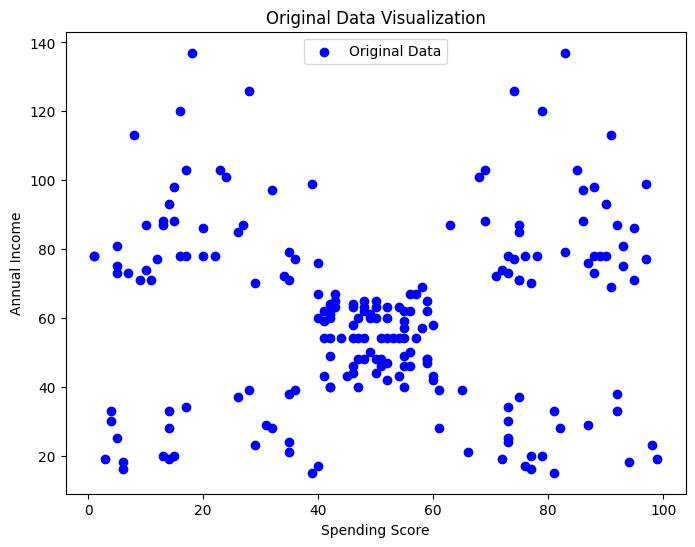

In [ ]:
x=df[["Spending Score (1-100)"]]
y=df[["Annual Income (k$)"]]
plt.figure(figsize=(8,6))
plt.scatter(x['Spending Score (1-100)'],y["Annual Income (k$)"],c="blue",label="Original Data")
plt.title('Original Data Visualization')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
y_train_scaled = scaler.fit_transform(y_train)
x_test_scaled = scaler.fit_transform(x_test)
y_test_scaled = scaler.fit_transform(y_test)

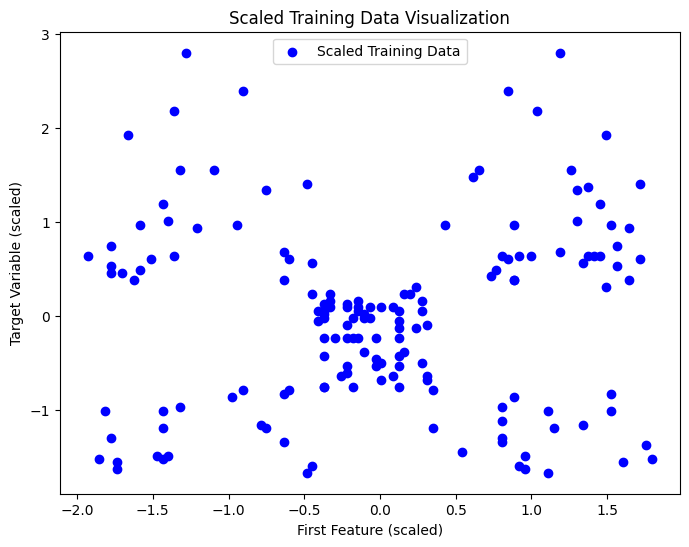

In [ ]:
# Visualize the scaled training data
plt.figure(figsize=(8,6))
plt.scatter(x_train_scaled[:, 0], y_train_scaled, c='blue', label='Scaled Training Data')
plt.title('Scaled Training Data Visualization')
plt.xlabel('First Feature (scaled)')
plt.ylabel('Target Variable (scaled)')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(x_train_scaled ,quantile=0.2)


In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
mean_shift_model = MeanShift(bandwidth=bandwidth)
cluster_labels_train = mean_shift_model.fit_predict(x_train_scaled)

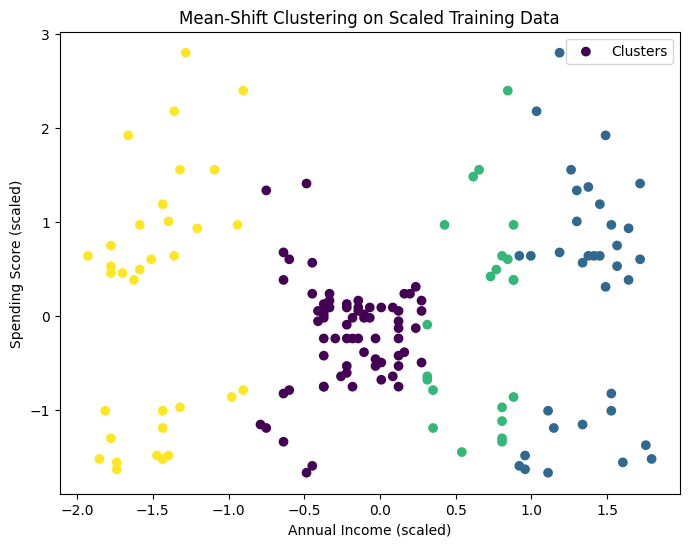

In [ ]:
# Visualize the clusters on the scaled training data
plt.figure(figsize=(8,6))
plt.scatter(x_train_scaled[:, 0], y_train_scaled, c=cluster_labels_train, cmap='viridis', label='Clusters')
plt.title('Mean-Shift Clustering on Scaled Training Data')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()